**Necessary imports and uploading our dataset csv. Please upload our csv using the button bellow**

In [5]:
import numpy as np # used for linear algebra
import pandas as pd # used for data processing, CSV file I/O (e.g. pd.read_csv)
import os

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

from google.colab import files
uploaded = files.upload()

Saving goodreads_data.csv to goodreads_data.csv


**Importing the dataset csv into the df variable**


In [6]:
import io
 
df = pd.read_csv(io.BytesIO(uploaded['goodreads_data.csv']))

**Creating the train set**

In [7]:
train_df=df
train_df.head()

,Unnamed: 0,Book,Author,Description,Genres,Avg_Rating,Num_Ratings,URL
0,0,To Kill a Mockingbird,Harper Lee,The unforgettable novel of a childhood in a sl...,"['Classics', 'Fiction', 'Historical Fiction', ...",4.27,"5,691,311",https://www.goodreads.com/book/show/2657.To_Ki...
1,1,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,Harry Potter thinks he is an ordinary boy - un...,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",4.47,"9,278,135",https://www.goodreads.com/book/show/72193.Harr...
2,2,Pride and Prejudice,Jane Austen,"Since its immediate success in 1813, Pride and...","['Classics', 'Fiction', 'Romance', 'Historical...",4.28,"3,944,155",https://www.goodreads.com/book/show/1885.Pride...
3,3,The Diary of a Young Girl,Anne Frank,Discovered in the attic in which she spent the...,"['Classics', 'Nonfiction', 'History', 'Biograp...",4.18,"3,488,438",https://www.goodreads.com/book/show/48855.The_...
4,4,Animal Farm,George Orwell,Librarian's note: There is an Alternate Cover ...,"['Classics', 'Fiction', 'Dystopia', 'Fantasy',...",3.98,"3,575,172",https://www.goodreads.com/book/show/170448.Ani...


In [8]:
len(train_df),train_df.index.shape[-1]


(10000, 10000)

**Necessary imports**

In [9]:
import numpy as np
import pandas as pd
import matplotlib.patches as mpatches
from nltk import word_tokenize
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud,STOPWORDS
import nltk
from nltk.corpus import stopwords
import string
from plotly import tools
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

**Printing the shape of our dataset**

In [ ]:
print("The Shape of the Dataset".format(),train_df.shape)

The Shape of the Dataset (10000, 8)


**Function for our 'Definitely Recommended" and "Recommended" books**

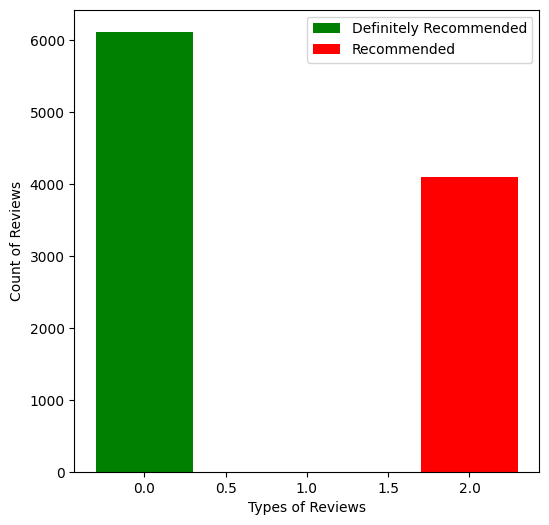

In [10]:
#Creating a function to plot the counts using matplotlib
def plot_counts(count_good,count_bad):
    plt.rcParams['figure.figsize']=(6,6)
    plt.bar(0,count_good,width=0.6,label='Definitely Recommended',color='Green')
    plt.legend()
    plt.bar(2,count_bad,width=0.6,label='Recommended',color='Red')
    plt.legend()
    plt.ylabel('Count of Reviews')
    plt.xlabel('Types of Reviews')
    plt.show()
    
count_good=train_df[train_df['Avg_Rating']>=4.0]
count_bad=train_df[train_df['Avg_Rating']<=4.0]
plot_counts(len(count_good),len(count_bad))

**Installing the transformers library**

In [2]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 32.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 39.4 MB/s eta 0:00:00


### **GPT-2 MODEL**

**Necessary imports for tokenizing and GPT-2 model**

In [17]:
import transformers
import torch
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer, pipeline, TFOpenAIGPTModel
from torch.utils.data import DataLoader, Dataset
from scipy.spatial.distance import cosine
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix

**Generative pretraining, tokenizing and the Cosine Distance Metric using the transformer_gpt_embedding**


In [13]:
z=train_df['Num_Ratings'].tolist()

All model checkpoint layers were used when initializing TFOpenAIGPTModel.

All the layers of TFOpenAIGPTModel were initialized from the model checkpoint at openai-gpt.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFOpenAIGPTModel for predictions without further training.
All model checkpoint layers were used when initializing TFOpenAIGPTModel.

All the layers of TFOpenAIGPTModel were initialized from the model checkpoint at openai-gpt.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFOpenAIGPTModel for predictions without further training.



Cosine Distance: 0.994995692177135


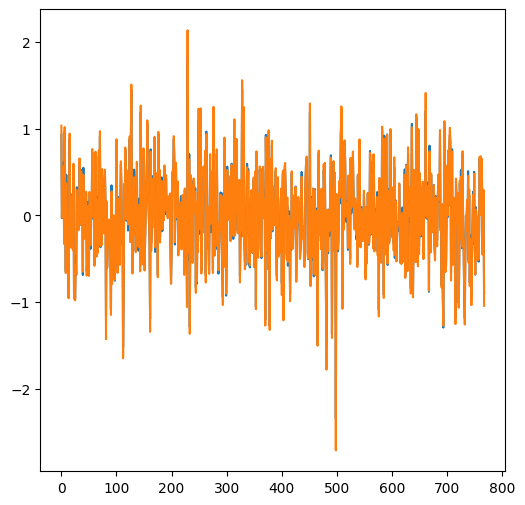

In [19]:
#GPT embeddings

def transformer_gpt_embedding(name,inp,model_name):

    model = model_name.from_pretrained(name)
    tokenizer = AutoTokenizer.from_pretrained(name)
    tokenizer.pad_token = "[PAD]"
    pipe = pipeline('feature-extraction', model=model, 
                tokenizer=tokenizer)
    features = pipe(inp)
    features = np.squeeze(features)
    return features
gpt_features1=transformer_gpt_embedding('openai-gpt',z[0],TFOpenAIGPTModel)
gpt_features2=transformer_gpt_embedding('openai-gpt',z[1],TFOpenAIGPTModel)
distance=1-cosine(gpt_features1[0],gpt_features2[0])
print()
print("Cosine Distance:", distance)
plt.plot(gpt_features1[0])
plt.plot(gpt_features2[0])
plt.show()

**Cosine Distance Metric using the TFGPT2Model**

You are using a model of type openai-gpt to instantiate a model of type gpt2. This is not supported for all configurations of models and can yield errors.
Some layers from the model checkpoint at openai-gpt were not used when initializing TFGPT2Model: ['transformer/positions_embed/embeddings:0', 'transformer/tokens_embed/weight:0']
- This IS expected if you are initializing TFGPT2Model from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFGPT2Model from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFGPT2Model were not initialized from the model checkpoint at openai-gpt and are newly initialized: ['transformer/ln_f/beta:0', 'transformer/wte/weight:0', 'transformer/wpe/weight:0', 'transform


Cosine Distance: 0.9883972801640067


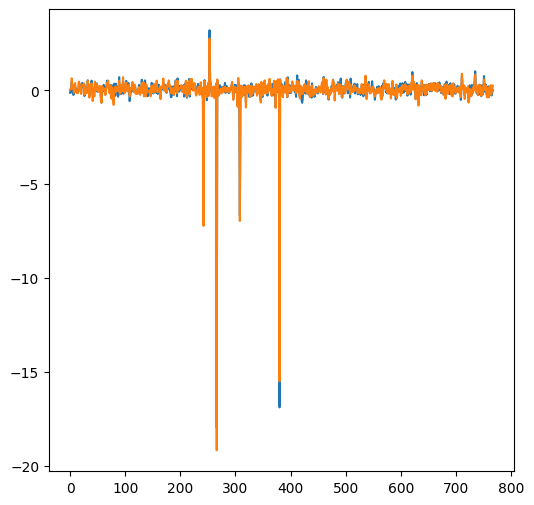

In [22]:
from transformers import AutoTokenizer, pipeline, TFGPT2Model

gpt2_features1=transformer_gpt_embedding('openai-gpt',z[0],TFGPT2Model)
gpt2_features2=transformer_gpt_embedding('openai-gpt',z[1],TFGPT2Model)
distance=1-cosine(gpt2_features1[0],gpt2_features2[0])
print()
print("Cosine Distance:", distance)
plt.plot(gpt2_features1[0])
plt.plot(gpt2_features2[0])
plt.show()